## Objective 
* One way to increase the number of bookings and conversion rate is to encourage users to complete their booking as fast as possible. 
* The call-to-action message that helps us achieve that is internally known as an ‘urgency message’. 


### Examples of urgency messages are:
* “Prices have been rising. Book now to lock in your rates!”
* “Your check-in is fast approaching. Book now to lock in your rates!”

Understand the price movement as the booking date approaches the check-in date and hear your suggestion on a business opportunity. Attached is a randomly sampled booking data from five cities with check-in between 10/01/2016 and 12/31/2016.



Data Dictionary:
* #- No record in each dataset
* ADR – Average daily rate (USD) per room.
* Hotel ID – Property identification number
* City ID – City identification number
* Star rating – Property’s star rating
* Accommodation Type Name – Property’s accommodation type
* Chain Hotel – Indicates whether the property is part of a chain.
* Booking date – The date on which the user makes a booking
* Check-in date – Date of check-in
* Check-out date – Date of check-out

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data frames
cityA = pd.read_csv('cityA.csv')
cityB = pd.read_csv('cityB.csv')
cityC = pd.read_csv('cityC.csv')
cityD = pd.read_csv('cityD.csv')
cityE = pd.read_csv('cityE.csv')

In [3]:
cityA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22366 entries, 0 to 22365
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        22366 non-null  object 
 1   ADR_USD                  22366 non-null  object 
 2   hotel_id                 22366 non-null  object 
 3   city_id                  22366 non-null  object 
 4   star_rating              22366 non-null  float64
 5   accommadation_type_name  22366 non-null  object 
 6   chain_hotel              22366 non-null  object 
 7   booking_date             22366 non-null  object 
 8   checkin_date             22366 non-null  object 
 9   checkout_date            22366 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.7+ MB


In [4]:
#convert the last 3 columns to datetime from all the dataframes
def convert_to_datetime(df, columns):

    for column in columns:
        df[column] = pd.to_datetime(df[column], format='%d/%m/%y')

# List of columns to convert to datetime
date_columns_cityA = ['booking_date', 'checkin_date', 'checkout_date']
convert_to_datetime(cityA, date_columns_cityA)

# Convert columns from cityA to convert to datetime
date_columns_cityB = ['booking_date', 'checkin_date', 'checkout_date']
convert_to_datetime(cityB, date_columns_cityB)

# Convert columns from cityB to convert to datetime
date_columns_cityC = ['booking_date', 'checkin_date', 'checkout_date']
convert_to_datetime(cityC, date_columns_cityC)

# Convert columns from cityC to convert to datetime
date_columns_cityD = ['booking_date', 'checkin_date', 'checkout_date']
convert_to_datetime(cityD, date_columns_cityD)

# Convert columns from cityD to convert to datetime
date_columns_cityE = ['booking_date', 'checkin_date', 'checkout_date']
convert_to_datetime(cityE, date_columns_cityE)

In [5]:
#function to convert the star rating column to float
def convert_column_to_float(df, column_name):
 
    df[column_name] = df[column_name].astype(float)

column_name_cityA = 'star_rating'  
convert_column_to_float(cityA, column_name_cityA)

column_name_cityB = 'star_rating'  
convert_column_to_float(cityB, column_name_cityB)

column_name_cityC = 'star_rating'  
convert_column_to_float(cityC, column_name_cityC)

column_name_cityD = 'star_rating'  
convert_column_to_float(cityD, column_name_cityD)

column_name_cityE = 'star_rating'  
convert_column_to_float(cityE, column_name_cityE)

In [6]:
cityA.rename(columns={'accommadation_type_name': 'accommodation_type_name'}, inplace=True)
cityB.rename(columns={'accommadation_type_name': 'accommodation_type_name'}, inplace=True)
cityC.rename(columns={'accommadation_type_name': 'accommodation_type_name'}, inplace=True)
cityD.rename(columns={'accommadation_type_name': 'accommodation_type_name'}, inplace=True)

In [7]:
def convert_columns_to_string(df, columns):
    for column in columns:
        df[column] = df[column].astype(str)
    return df

columns_to_convert_cityA = ['chain_hotel', 'accommodation_type_name'] 
cityA = convert_columns_to_string(cityA, columns_to_convert_cityA)

columns_to_convert_cityB = ['chain_hotel', 'accommodation_type_name'] 
cityB = convert_columns_to_string(cityB, columns_to_convert_cityB)

columns_to_convert_cityC = ['chain_hotel', 'accommodation_type_name'] 
cityC = convert_columns_to_string(cityC, columns_to_convert_cityC)

columns_to_convert_cityD = ['chain_hotel', 'accommodation_type_name'] 
cityD = convert_columns_to_string(cityD, columns_to_convert_cityD)

columns_to_convert_cityE = ['chain_hotel', 'accommodation_type_name'] 
cityE = convert_columns_to_string(cityE, columns_to_convert_cityE)



In [8]:
#chnage ADR_USD, Hotel_id and city_id to string and remove special characters
def preprocess_and_convert(df, columns):
    for col in columns:
        # Check if the column contains string values
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '').str.strip().astype(float)
    
    return df

columns_to_preprocess_and_convert_cityA = ['ADR_USD', 'hotel_id', 'city_id']
cityA = preprocess_and_convert(cityA, columns_to_preprocess_and_convert_cityA)

columns_to_preprocess_and_convert_cityB = ['ADR_USD', 'hotel_id', 'city_id']
cityB = preprocess_and_convert(cityB, columns_to_preprocess_and_convert_cityB)

columns_to_preprocess_and_convert_cityC = ['ADR_USD', 'hotel_id', 'city_id']
cityC = preprocess_and_convert(cityC, columns_to_preprocess_and_convert_cityC)

columns_to_preprocess_and_convert_cityD = ['ADR_USD', 'hotel_id', 'city_id']
cityD = preprocess_and_convert(cityD, columns_to_preprocess_and_convert_cityD)

columns_to_preprocess_and_convert_cityE = ['ADR_USD', 'hotel_id', 'city_id']
cityE = preprocess_and_convert(cityE, columns_to_preprocess_and_convert_cityE)


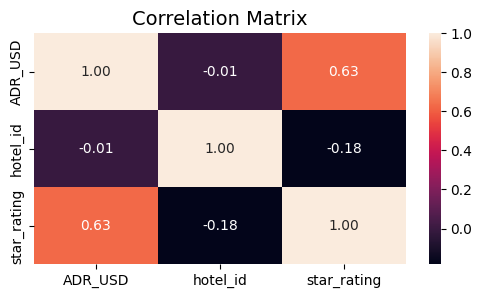

In [9]:
numeric_columns = cityA.select_dtypes(include='number').drop(columns=['city_id']) #cityA correlation matrix

f = plt.figure(figsize=(6, 3)) 
sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix', fontsize=14)
plt.show()


In [10]:
# Concatenate all city DataFrames into one DataFrame

city_data = [cityA, cityB, cityC, cityD, cityE]
all_city_df = pd.concat(city_data, ignore_index=True)
all_city_df.index = range(1, len(all_city_df) + 1)


In [11]:
#check for null values
all_city_df.isna().sum()

# Remove rows where specified columns have NaN values
all_city_df = all_city_df.dropna(subset=['ADR_USD', 'hotel_id', 'city_id', 'star_rating', 
                                          'booking_date', 'checkin_date', 'checkout_date', 
                                          ], how='all')


In [12]:
all_city_df['booking_week'] = all_city_df['booking_date'].dt.strftime("%U").astype(int) - 30

# Check if either check-in or check-out day is a Friday, Saturday or Sunday
all_city_df['is_weekend_stay'] = ((all_city_df['checkin_date'].dt.dayofweek >= 5) | 
                                (all_city_df['checkout_date'].dt.dayofweek >= 5))

# Check if the booking was made on a weekend (Friday, Saturday or Sunday)
all_city_df['is_weekend_booking'] = (all_city_df['booking_date'].dt.dayofweek >= 5)

In [13]:
# Calculate Length of Stay (LOS) in days
all_city_df['length_of_stay'] = (all_city_df['checkout_date'] - all_city_df['checkin_date']).dt.days

In [14]:
all_city_df['lead_time'] = all_city_df['checkin_date'] - all_city_df['booking_date']
all_city_df['lead_time'] = all_city_df['lead_time'].dt.days.astype(int)


In [15]:
# Define mapping dictionary
city_mapping = {
    9395.0: 'A',
    17193.0: 'B',
    5085.0: 'C',
    16808.0: 'D',
    8584.0 : 'E'
}

# Create 'city_name' column based on 'city_id' values
all_city_df['city_name'] = all_city_df['city_id'].map(city_mapping)

In [16]:
all_city_df['total_booking_amount'] = all_city_df['ADR_USD'] * all_city_df['length_of_stay']

In [17]:
all_city_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49064 entries, 1 to 62118
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   #                        49064 non-null  object        
 1   ADR_USD                  49064 non-null  float64       
 2   hotel_id                 49064 non-null  float64       
 3   city_id                  49064 non-null  float64       
 4   star_rating              49064 non-null  float64       
 5   accommodation_type_name  49064 non-null  object        
 6   chain_hotel              49064 non-null  object        
 7   booking_date             49064 non-null  datetime64[ns]
 8   checkin_date             49064 non-null  datetime64[ns]
 9   checkout_date            49064 non-null  datetime64[ns]
 10  booking_week             49064 non-null  int64         
 11  is_weekend_stay          49064 non-null  bool          
 12  is_weekend_booking       49064 non-nu

In [18]:
# Group by city_id and booking_id, and count the occurrences of each booking_id within each city
bookings_per_city = all_city_df.groupby('city_name').agg({'total_booking_amount': ["count", "sum"]})

# Calculate total bookings for all cities
total_bookings_all_cities = bookings_per_city.sum()

percentage_contribution_per_city = (bookings_per_city / total_bookings_all_cities) * 100

print("Total Bookings for All Cities:", total_bookings_all_cities)
print("\nBookings per City:")
print(bookings_per_city)
print("\nPercentage Contribution of Bookings per City:")
print(percentage_contribution_per_city)


Total Bookings for All Cities: total_booking_amount  count       49064.00
                      sum      12552565.71
dtype: float64

Bookings per City:
          total_booking_amount            
                         count         sum
city_name                                 
A                        22366  3897959.45
B                         4932  1082585.19
C                         6797  2752434.82
D                        10152  3760328.66
E                         4817  1059257.59

Percentage Contribution of Bookings per City:
          total_booking_amount           
                         count        sum
city_name                                
A                    45.585358  31.053089
B                    10.052177   8.624414
C                    13.853334  21.927269
D                    20.691342  29.956654
E                     9.817789   8.438574


In [19]:
# Filter the DataFrame to include only bookings with lead times between 1 and 12 days
bookings_1_to_12_days_lead_time = all_city_df[(all_city_df['lead_time'] <= 12)]

# Calculate the total booking amount for lead times between 1 and 12 days
total_booking_amount_1_to_12_days_lead_time = bookings_1_to_12_days_lead_time['total_booking_amount'].sum()

# Calculate the total booking amount for all bookings
total_booking_amount_all = all_city_df['total_booking_amount'].sum()

# Calculate the percentage of booking amount for lead times between 1 and 12 days
percentage_booking_amount_1_to_12_days_lead_time = (total_booking_amount_1_to_12_days_lead_time / total_booking_amount_all) * 100

print("Percentage of booking amount for lead times between 1 and 12 days:", percentage_booking_amount_1_to_12_days_lead_time)


Percentage of booking amount for lead times between 1 and 12 days: 50.16148893754726


In [20]:
weekend_stay_counts = all_city_df['is_weekend_stay'].value_counts()
percentage_weekend_stays = (weekend_stay_counts[True] / weekend_stay_counts.sum()) * 100
print('The percentage of people who stay on weekends are:', round(percentage_weekend_stays))

The percentage of people who stay on weekends are: 57


In [21]:
weekend_booking_counts = all_city_df['is_weekend_booking'].value_counts()
percentage_weekend_bookings = (weekend_booking_counts[True] / weekend_booking_counts.sum()) * 100

print('The number of people who make a booking on weekend:', round(percentage_weekend_bookings))

The number of people who make a booking on weekend: 25


In [22]:
# Calculate total booking amount for all bookings
total_booking_amount_all = all_city_df['total_booking_amount'].sum()

# Filter weekend bookings and calculate total booking amount for weekend bookings
weekend_bookings = all_city_df[all_city_df['is_weekend_stay'] == True]
total_booking_amount_weekend = weekend_bookings['total_booking_amount'].sum()

# Calculate percentage of total booking amount contributed by weekend bookings
percentage_weekend_booking_amount = (total_booking_amount_weekend / total_booking_amount_all) * 100

print("Percentage of total booking amount contributed by weekend bookings:", percentage_weekend_booking_amount)


Percentage of total booking amount contributed by weekend bookings: 60.70163937823354


In [23]:
columns_to_drop = ['#']
all_city_df = all_city_df.drop(columns=columns_to_drop)

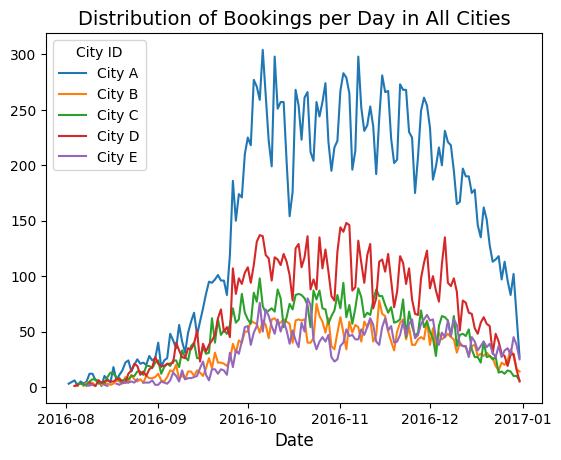

In [24]:
# Grouping by city and booking date
booking_counts = all_city_df.groupby(['city_name', 'booking_date']).size()

# Unstacking to create a pivot table
pivot_df = booking_counts.unstack(level='city_name')

# Plotting each city separately to distinguish them with different colors
for city in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[city], label=f'City {city}')

plt.title('Distribution of Bookings per Day in All Cities', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.legend(title='City ID', fontsize=10);


In [25]:
# Extract day of the week from 'booking_date' and calculate counts for each day
booking_day_counts = all_city_df['booking_date'].dt.day_name().value_counts()

# Find the day with the maximum bookings
max_booking_day = booking_day_counts.idxmax()

print("Day with maximum bookings:", max_booking_day)


Day with maximum bookings: Tuesday


In [26]:
city_analysis = all_city_df.groupby("city_name").describe().T
hotel_analysis = all_city_df.groupby("hotel_id").describe().T
star_analysis = all_city_df.groupby("star_rating").describe().T
accommodation_type_name_analysis = all_city_df.groupby("accommodation_type_name").describe().T
chain_hotel_analysis = all_city_df.groupby("chain_hotel").describe().T
is_weekend_stay_analysis = all_city_df.groupby("is_weekend_stay").describe().T
is_weekend_booking_analysis = all_city_df.groupby("is_weekend_booking").describe().T
length_of_stay_analysis = all_city_df.groupby("length_of_stay").describe().T
lead_time_analysis = all_city_df.groupby("lead_time").describe().T

<Axes: xlabel='city_name'>

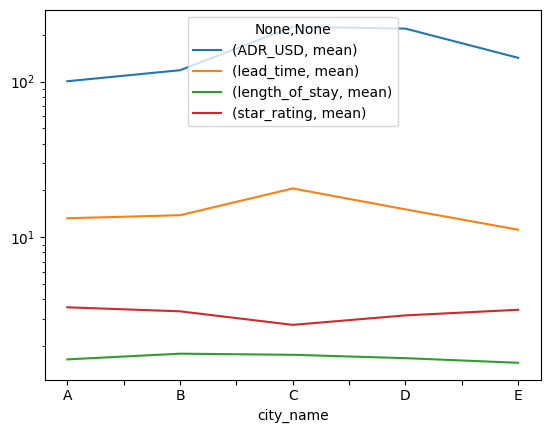

In [27]:
city_analysis.loc[[('ADR_USD', 'mean'), ('lead_time', 'mean'), ('length_of_stay', 'mean'), ('star_rating', 'mean')]].T.plot(kind="line", logy=True)

In [28]:
# Group by city_name and sum the total_booking_amount for each city
city_total_booking = all_city_df.groupby('city_name')['total_booking_amount'].sum()

# Calculate the total sum of total_booking_amount across all cities
total_booking_sum = city_total_booking.sum()

# Calculate the percentage of total_booking_amount for each city
city_percentage = (city_total_booking / total_booking_sum) * 100

print('total booking sum', total_booking_sum)
print("Percentage of Total Booking Amount per City:", city_percentage)



total booking sum 12552565.71
Percentage of Total Booking Amount per City: city_name
A    31.053089
B     8.624414
C    21.927269
D    29.956654
E     8.438574
Name: total_booking_amount, dtype: float64


In [29]:
bookings_50_percent = (all_city_df['lead_time'] <= 8).sum()
total_bookings = all_city_df['booking_date'].count()
percentage_bookings_days_before_checkin = (bookings_50_percent / total_bookings) * 100

print("50% of the bookings happen 8 days closer to the checkin date:", round(percentage_bookings_days_before_checkin))


50% of the bookings happen 8 days closer to the checkin date: 50


In [30]:
# Count the number of bookings with lead times 14
bookings_14 = (all_city_df['lead_time'] <= 14).sum()
total_bookings = all_city_df['booking_date'].count()

# Calculate the percentage of people who fall within the lead time between 14
percentage_bookings_14 = (bookings_14 / total_bookings) * 100

print("Percentage of people with lead time as 14 days or less:", round(percentage_bookings_14))


Percentage of people with lead time as 14 days or less: 63


In [31]:
# Calculate the average lead time for bookings
average_lead_time = all_city_df['lead_time'].mean()

print("Average lead time for bookings (days):", round(average_lead_time))


Average lead time for bookings (days): 15


In [32]:
# Count the number of bookings with lead times between 1 and 12 days
bookings_1_to_12_days_before_checkin = (all_city_df['lead_time'] <= 12).sum()

# Calculate the total number of bookings
total_bookings = len(all_city_df)

# Calculate the percentage of people who book within 1-12 days before check-in
percentage_bookings_1_to_12_days_before_checkin = (bookings_1_to_12_days_before_checkin / total_bookings) * 100

print("Percentage of people who book within 12 days before check-in:", round(percentage_bookings_1_to_12_days_before_checkin))


Percentage of people who book within 12 days before check-in: 59


In [33]:
bookings_8_days_before_checkin_df = all_city_df[all_city_df['lead_time'] <= 8]

# Calculate the total revenue from these bookings
total_revenue_8_days_before_checkin = bookings_8_days_before_checkin_df['total_booking_amount'].sum()

# Calculate the total revenue from all bookings
total_revenue_all_bookings = all_city_df['total_booking_amount'].sum()

# Calculate the revenue contribution percentage
revenue_contribution_percentage = (total_revenue_8_days_before_checkin / total_revenue_all_bookings) * 100

print("Revenue contribution percentage of bookings made 8 days before check-in:", revenue_contribution_percentage)


Revenue contribution percentage of bookings made 8 days before check-in: 40.96282137685778


In [34]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(all_city_df, x='booking_date', y='ADR_USD', trendline='lowess', title='ADR During Booking Date')

# Accessing the trendline data and updating its color
fig.data[1].update(line=dict(color='red'))

# Update marker properties
fig.update_traces(marker=dict(size=5, opacity=0.6))

fig.show()


In [35]:
import plotly.express as px
import plotly.graph_objects as go

# Create a scatter plot with polynomial fit line for ADR during booking_date
fig = px.scatter(all_city_df, x='length_of_stay', y='total_booking_amount', trendline='lowess', title='total_booking_amount and length of stay')

# Accessing the trendline data and updating its color
fig.data[1].update(line=dict(color='red'))

# Update marker properties
fig.update_traces(marker=dict(size=5, opacity=0.6))

fig.show()


In [36]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error

# # Define features (X) and target variable (y)
# X = all_city_df[[ 'star_rating', 'length_of_stay','city_id', 'is_weekend_stay', 'is_weekend_booking', 'accommodation_type_name', 'chain_hotel', 'booking_week', 'lead_time']]  # Add relevant features
# y = all_city_df['ADR_USD']

# # Convert categorical variables to dummy/indicator variables
# X = pd.get_dummies(X, columns=['city_id', 'accommodation_type_name', 'chain_hotel', 'star_rating','is_weekend_stay', 'is_weekend_booking' ])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# # Evaluate the model
# mae_train = mean_absolute_error(y_train, y_pred_train)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# print("Train MAE:", mae_train)
# print("Test MAE:", mae_test)

# # Interpret coefficients
# coefficients = dict(zip(X.columns, model.coef_))
# print("Coefficients:", coefficients)


In [37]:
# import matplotlib.pyplot as plt

# sorted_coefficients = sorted(coefficients.items(), key=lambda x: x[1])
# print(sorted_coefficients)

# # Convert dictionary to lists for plotting
# features = list(map(lambda x: x[0], sorted_coefficients))
# values = list(map(lambda x: x[1], sorted_coefficients))

# # Plotting
# plt.figure(figsize=(14, 8))
# plt.barh(features, values, )
# plt.xlabel('Coefficient Value')
# plt.ylabel('Feature')
# plt.title('Coefficients of Features')
# plt.show()


In [38]:
# accomodation_booking_type = all_city_df.groupby('accommodation_type_name')['total_booking_amount'].sum()
# total_booking_sum = accomodation_booking_type.sum()
# hotel_percentage = (accomodation_booking_type / total_booking_sum) * 100
# print(hotel_percentage)


In [39]:
all_city_df.to_csv('all_city_data.csv', index=False)

In [40]:
# g1 = all_city_df.groupby("accommodation_type_name").agg({
#     # "lead_time": ["mean", "count", "min", "max", "std"]
# })
# m1 = g1["lead_time"]["count"] > 1000

In [41]:
# g1[m1]

In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error

# # Define features (X) and target variable (y)
# X = all_city_df[[ 'star_rating', 'length_of_stay','hotel_id', 'is_weekend_stay', 'is_weekend_booking', 'accommodation_type_name', 'chain_hotel', 'booking_week']]  # Add relevant features
# y = all_city_df['lead_time']

# # Convert categorical variables to dummy/indicator variables
# X = pd.get_dummies(X, columns=['accommodation_type_name', 'chain_hotel', 'star_rating','is_weekend_stay', 'is_weekend_booking' ])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions
# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# # Evaluate the model
# mae_train = mean_absolute_error(y_train, y_pred_train)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# print("Train MAE:", mae_train)
# print("Test MAE:", mae_test)

# # Interpret coefficients
# coefficients = dict(zip(X.columns, model.coef_))
# print("Coefficients:", coefficients)


In [43]:
# Filter the DataFrame for bookings in City C
city_c_bookings = all_city_df[all_city_df['city_name'] == 'C']
average_lead_time_city_c = city_c_bookings['lead_time'].mean()

print("Average lead time for bookings in City C:", average_lead_time_city_c)


Average lead time for bookings in City C: 20.612476092393702


In [44]:
all_city_df['day_of_week'] = all_city_df['checkin_date'].dt.day_name()

friday_count = (all_city_df['day_of_week'] == 'Friday').sum()
saturday_count = (all_city_df['day_of_week'] == 'Saturday').sum()
sunday_count = (all_city_df['day_of_week'] == 'Sunday').sum()


# Calculate the total number of check-ins
total_checkins = len(all_city_df)

friday_percentage = (friday_count / total_checkins) * 100
saturday_percentage = (saturday_count / total_checkins) * 100
sunday_percentage = (sunday_count / total_checkins) * 100


print("Percentage of check-ins on Friday:", friday_percentage)
print("Percentage of check-ins on Saturday:", saturday_percentage)
print("Percentage of check-ins on Sunday:", sunday_percentage)



Percentage of check-ins on Friday: 17.73194195336703
Percentage of check-ins on Saturday: 20.255176911788684
Percentage of check-ins on Sunday: 12.870944073047449


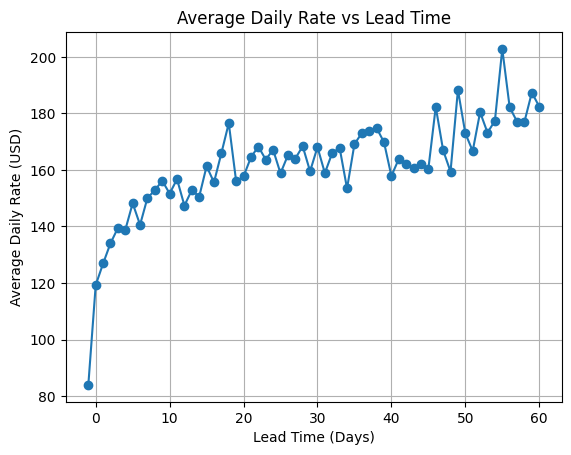

In [45]:
# Group by lead time and calculate the average ADR for each lead time
average_adr_by_lead_time = all_city_df.groupby('lead_time')['ADR_USD'].mean().reset_index()

# Plotting ADR against lead time
import matplotlib.pyplot as plt

plt.plot(average_adr_by_lead_time['lead_time'], average_adr_by_lead_time['ADR_USD'], marker='o')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Average Daily Rate (USD)')
plt.title('Average Daily Rate vs Lead Time')
plt.grid(True)
plt.show()


In [46]:
all_city_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49064 entries, 1 to 62118
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ADR_USD                  49064 non-null  float64       
 1   hotel_id                 49064 non-null  float64       
 2   city_id                  49064 non-null  float64       
 3   star_rating              49064 non-null  float64       
 4   accommodation_type_name  49064 non-null  object        
 5   chain_hotel              49064 non-null  object        
 6   booking_date             49064 non-null  datetime64[ns]
 7   checkin_date             49064 non-null  datetime64[ns]
 8   checkout_date            49064 non-null  datetime64[ns]
 9   booking_week             49064 non-null  int64         
 10  is_weekend_stay          49064 non-null  bool          
 11  is_weekend_booking       49064 non-null  bool          
 12  length_of_stay           49064 non-nu

In [47]:
new_df = all_city_df[['length_of_stay','booking_week','ADR_USD','lead_time','city_id','is_weekend_stay', 'is_weekend_booking', 'hotel_id', 'star_rating', 'accommodation_type_name']]


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = new_df[['booking_week','accommodation_type_name', 'length_of_stay','lead_time','city_id','is_weekend_stay', 'is_weekend_booking', 'hotel_id', 'star_rating']]
y = new_df['ADR_USD']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['city_id', 'hotel_id', 'accommodation_type_name', 'star_rating','is_weekend_stay', 'is_weekend_booking' ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict ADR with original lead time
y_pred_original = model.predict(X_test)

X_test_increased_lead_time = X_test.copy(deep=True)
X_test_increased_lead_time['lead_time'] += 7 

# Predict ADR with increased lead time
y_pred_increased_lead_time = model.predict(X_test_increased_lead_time)

# Calculate ADR difference
adr_difference = y_pred_increased_lead_time - y_pred_original


In [49]:
def search(lt):
    # Increase lead time by 1 day (adjust as needed)
    X_test_increased_lead_time = X_test.copy(deep=True)
    X_test_increased_lead_time['lead_time'] += lt  
    # Predict ADR with increased lead time
    y_pred_increased_lead_time = model.predict(X_test_increased_lead_time)

    # Calculate ADR difference
    adr_difference = y_pred_increased_lead_time - y_pred_original
    return adr_difference.mean()
    

scope = { i: search(i) for i in range(0, 60)}

In [50]:
scope

{0: 0.0,
 1: -0.21154970444241644,
 2: 0.3268839011237113,
 3: 0.8279441820180717,
 4: 1.6620834447620199,
 5: 2.270033038708954,
 6: 2.6716093863264274,
 7: 3.3504565169806284,
 8: 4.509272319930862,
 9: 5.242793288364526,
 10: 5.739617954516959,
 11: 6.266208744581938,
 12: 7.066123448061538,
 13: 7.57176394844909,
 14: 8.565047495765876,
 15: 9.217274903830596,
 16: 9.944446590570319,
 17: 10.930133278951859,
 18: 11.640389771531936,
 19: 12.475512385807784,
 20: 13.31640424272036,
 21: 13.95695464213016,
 22: 14.628740217369089,
 23: 15.26358100615106,
 24: 15.794064554214124,
 25: 16.150390683789563,
 26: 16.46628458437334,
 27: 17.14537048200832,
 28: 17.816148807569327,
 29: 18.50177119457208,
 30: 18.637635336048717,
 31: 18.786814842825443,
 32: 19.02043993654775,
 33: 19.481422627835137,
 34: 20.039350777050135,
 35: 20.65603280785887,
 36: 21.60938009404783,
 37: 22.852377215614343,
 38: 23.90046701493009,
 39: 23.833586022676535,
 40: 23.583182008678993,
 41: 23.79110701225

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_original)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_original)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_original)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Absolute Error: 33.4823938896317
Mean Squared Error: 4806.222411303274
R-squared: 0.7393065318921221


In [52]:
# Create DataFrame with actual and predicted ADR values
comparison_df = pd.DataFrame({
    'Actual_ADR': y_test,
    'Predicted_ADR_Original': y_pred_original,
    'Predicted_ADR_Increased_Lead_Time': y_pred_increased_lead_time,
    'ADR_Difference': adr_difference
})

# Display the DataFrame
print(comparison_df)

comparison_df["Predicted_ADR_Increased_Lead_Time"]


       Actual_ADR  Predicted_ADR_Original  Predicted_ADR_Increased_Lead_Time  \
52452      252.74              200.031000                            218.278   
11169      130.81              195.587000                            177.990   
24811       51.12               51.140000                             54.198   
37633      374.39              425.050000                            400.399   
709         73.76               75.980000                             71.261   
...           ...                     ...                                ...   
56376      239.34              304.535000                            395.107   
1624       280.60              195.084000                            194.409   
60491       26.42               26.326000                             31.308   
56026      221.26              216.765933                            218.096   
8135        66.04               41.915333                             44.810   

       ADR_Difference  
52452       18.

52452    218.278
11169    177.990
24811     54.198
37633    400.399
709       71.261
          ...   
56376    395.107
1624     194.409
60491     31.308
56026    218.096
8135      44.810
Name: Predicted_ADR_Increased_Lead_Time, Length: 9813, dtype: float64

In [53]:
# Assuming adr_difference is your array
adr_difference_series = pd.Series(adr_difference)
adr_difference_series.mean()


3.3504565169806284

In [54]:
comparison_df["delta"] = comparison_df.ADR_Difference / comparison_df.Predicted_ADR_Original
comparison_df.delta.mean() * 100

4.4074730258142205

In [55]:
all_city_df

ADR_USD   hotel_id  city_id  star_rating accommodation_type_name  \
1        71.06   297388.0   9395.0          2.5                   Hotel   
2        76.56   298322.0   9395.0          3.0                   Hotel   
3       153.88  2313076.0   9395.0          5.0                   Hotel   
4       126.60  2240838.0   9395.0          3.5                   Hotel   
5       115.08  2240838.0   9395.0          3.5                   Hotel   
...        ...        ...      ...          ...                     ...   
62114    72.58   130890.0   8584.0          4.0                   Hotel   
62115    70.02   130890.0   8584.0          4.0                   Hotel   
62116   921.26    21720.0   8584.0          5.0                  Resort   
62117   345.09    21720.0   8584.0          5.0                  Resort   
62118   303.52    21720.0   8584.0          5.0                  Resort   

      chain_hotel booking_date checkin_date checkout_date  booking_week  \
1       non-chain   2016-08-02   2016-10-01    2016-10-02             1   
2       non-chain   2016-08-02   2016-10-01    2016-10-02             1   
3           chain   2016-08-02   2016-10-01    2016-10-02             1   
4       non-chain   2016-08-04   2016-10-02    2016-10-03             1   
5       non-chain   2016-08-04   2016-10-02    2016-10-03             1   
...           ...          ...          ...           ...           ...   
62114   non-chain   2016-12-31   2016-12-31    2017-01-02            22   
62115   non-chain   2016-12-31   2016-12-31    2017-01-01            22   
62116   non-chain   2016-12-31   2016-12-31    2017-01-01            22   
62117   non-chain   2016-12-31   2016-12-31    2017-01-03            22   
62118   non-chain   2016-12-31   2016-12-31    2017-01-01            22   

       is_weekend_stay  is_weekend_booking  length_of_stay  lead_time  \
1                 True               False               1         60   
2                 True               False               1         60   
3                 True               False               1         60   
4                 True               False               1         59   
5                 True               False               1         59   
...                ...                 ...             ...        ...   
62114             True                True               2          0   
62115             True                True               1          0   
62116             True                True               1          0   
62117             True                True               3          0   
62118             True                True               1          0   

      city_name  total_booking_amount day_of_week  
1             A                 71.06    Saturday  
2             A                 76.56    Saturday  
3             A                153.88    Saturday  
4             A                126.60      Sunday  
5             A                115.08      Sunday  
...         ...                   ...         ...  
62114         E                145.16    Saturday  
62115         E                 70.02    Saturday  
62116         E                921.26    Saturday  
62117         E               1035.27    Saturday  
62118         E                303.52    Saturday  

[49064 rows x 17 columns]

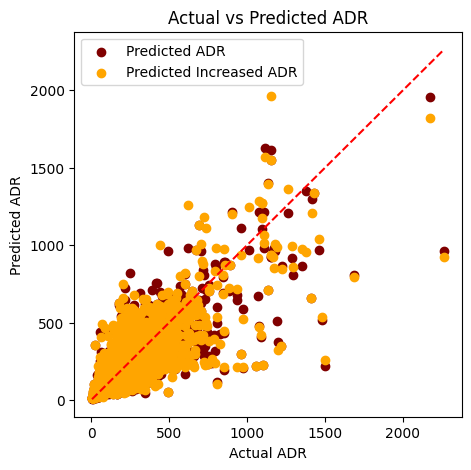

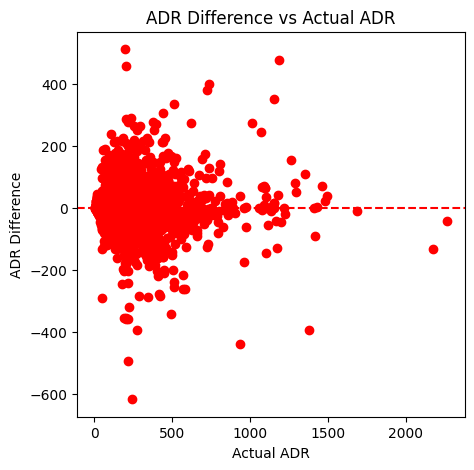

In [56]:
import matplotlib.pyplot as plt

# Plot actual vs predicted ADR
plt.figure(figsize=(5,5))
plt.scatter(y=y_pred_original, x=y_test, color='maroon', label='Predicted ADR')
plt.scatter(y=y_pred_increased_lead_time, x=y_test, color='orange', label='Predicted Increased ADR')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual ADR')
plt.ylabel('Predicted ADR')
plt.title('Actual vs Predicted ADR')
plt.legend()
plt.show()

# Plot ADR difference
plt.figure(figsize=(5,5))
plt.scatter(y_test, adr_difference, color='red')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual ADR')
plt.ylabel('ADR Difference')
plt.title('ADR Difference vs Actual ADR')
plt.show()


In [57]:
# Define the number of segments
num_segments = 5

# Use qcut to segment the data with equal counts
all_city_df['ADR_Segment'] = pd.qcut(all_city_df['ADR_USD'], q=num_segments)


In [58]:
g1 = all_city_df.groupby('ADR_Segment').describe()

/var/folders/f2/d3zb7g417sgdklvf0bbv8jzm0000gn/T/ipykernel_43787/161043490.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [59]:
g1.T.loc[["lead_time"]].T

lead_time                                         \
                                count       mean  min  25%   50%   75%   max   
ADR_Segment                                                                    
(4.2589999999999995, 55.18]    9816.0  11.622046 -1.0  1.0   5.0  17.0  60.0   
(55.18, 88.74]                 9812.0  13.668875 -1.0  1.0   7.0  22.0  60.0   
(88.74, 139.776]               9810.0  13.300815  0.0  2.0   7.0  20.0  60.0   
(139.776, 214.178]             9813.0  16.403241 -1.0  3.0  11.0  26.0  60.0   
(214.178, 3156.86]             9813.0  17.652808  0.0  4.0  13.0  28.0  60.0   

                                        
                                   std  
ADR_Segment                             
(4.2589999999999995, 55.18]  14.333918  
(55.18, 88.74]               15.548121  
(88.74, 139.776]             15.015937  
(139.776, 214.178]           16.213583  
(214.178, 3156.86]           16.431113

In [60]:
all_city_df['ADR_Segment'].value_counts()

ADR_Segment
(4.2589999999999995, 55.18]    9816
(139.776, 214.178]             9813
(214.178, 3156.86]             9813
(55.18, 88.74]                 9812
(88.74, 139.776]               9810
Name: count, dtype: int64